In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import keras
import sklearn.metrics as metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

2023-06-22 15:06:52.858608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 15:06:53.131205: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-22 15:06:53.852558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/aaron/anaconda3/envs/tf/lib/
2023-06-22 15:06:53.852639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

In [2]:
df = pd.read_csv("//home//aaron//Downloads//archive//hmnist_28_28_RGB.csv")
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
# defining the number of classes
num_classes = 7
# Hyper parameters
batch_size = 128
epochs = 16

#rows and columns representing the pixels
img_rows = 28
img_cols = 28

# removing the 'label' column from the data frame 
images = df.drop(['label'], axis=1)
# keeping only the label column
labels = df['label']

In [4]:
# Remove label column and normalize the images
scaler = StandardScaler()
images = scaler.fit_transform(df.drop(['label'], axis=1))

# Create a RandomOverSampler instance
oversample = RandomOverSampler()

# Apply oversampling to both images and labels
images, labels = oversample.fit_resample(images, df['label'])

# Reshape the images
images = images.reshape(-1, 28, 28, 3)

print('Shape of images:', images.shape)

# Normalizing the images.
images = (images-np.mean(images))/np.std(images)

Shape of images: (46935, 28, 28, 3)


In [5]:
#state is set to a constant so that the splitting can be done reproducibly
x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=1, test_size=0.20)

# encoding labels to one-hot vectors
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [6]:
start = time.time()

In [7]:
# Model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Add more Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


# Fitting the model
callback = tf.keras.callbacks.ModelCheckpoint(filepath='trained-models/cnn-best-model-L.h5', monitor='val_accuracy', mode='max', verbose=1)
callback_early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[callback, callback_early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

2023-06-22 15:06:59.188981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-22 15:06:59.200692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-22 15:06:59.200894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-22 15:06:59.201418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/16


2023-06-22 15:07:01.891138: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-06-22 15:07:03.007873: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-22 15:07:03.008674: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-22 15:07:03.008724: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-06-22 15:07:03.009455: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-22 15:07:03.009506: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-06-22 15:07:03.970597: I tensorflow/stream_executor/cuda/c

235/235 [==============================] - ETA: 0s - loss: 1.2304 - accuracy: 0.5284
Epoch 1: saving model to trained-models/cnn-best-model-L.h5
235/235 [==============================] - 7s 15ms/step - loss: 1.2304 - accuracy: 0.5284 - val_loss: 0.8138 - val_accuracy: 0.7027
Epoch 2/16
234/235 [============================>.] - ETA: 0s - loss: 0.8043 - accuracy: 0.6990
Epoch 2: saving model to trained-models/cnn-best-model-L.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.8039 - accuracy: 0.6992 - val_loss: 0.5743 - val_accuracy: 0.7928
Epoch 3/16
234/235 [============================>.] - ETA: 0s - loss: 0.6158 - accuracy: 0.7715
Epoch 3: saving model to trained-models/cnn-best-model-L.h5
235/235 [==============================] - 2s 7ms/step - loss: 0.6160 - accuracy: 0.7715 - val_loss: 0.4504 - val_accuracy: 0.8370
Epoch 4/16
232/235 [============================>.] - ETA: 0s - loss: 0.4973 - accuracy: 0.8149
Epoch 4: saving model to trained-models/cnn-best-mode

In [8]:
stop = time.time()

# Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f,' % (score[0]))
print('Accuracy: %.2f%%' % (score[1] * 100))

Summary: Loss over the test dataset: 0.11,
Accuracy: 96.11%


In [9]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get the unique class labels
class_labels = np.unique(np.concatenate((y_true, y_pred_classes)))

# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred_classes, labels=class_labels)

294/294 [==============================] - 1s 2ms/step


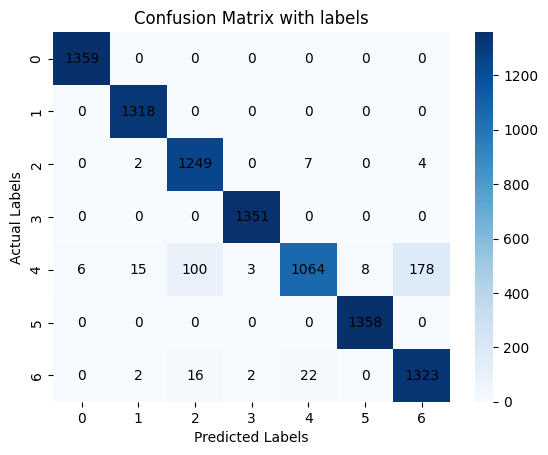

In [10]:
# Create the heatmap
ax = sns.heatmap(confusion_matrix, fmt='d', cmap='Blues')

# Set the title and labels
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.collections[0].colorbar.ax.tick_params(labelsize=10)

# Add value annotations
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{confusion_matrix[i, j]}',
                ha='center', va='center', color='black', fontsize=10)

plt.show()

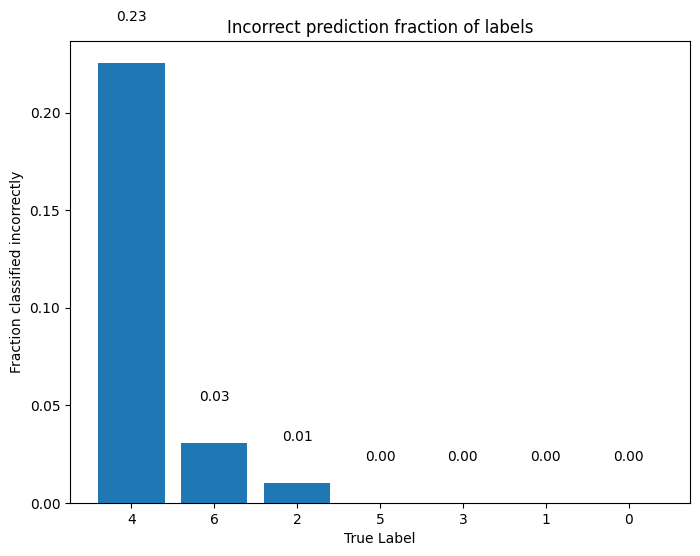

In [11]:
frac_error = 1 - np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

# Sort classes based on incorrect prediction fraction
sorted_indices = np.argsort(frac_error)[::-1]
frac_error_sorted = frac_error[sorted_indices]

# Create the figure and plot
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(frac_error_sorted)), frac_error_sorted)

# Add labels to the bars
for i, frac in enumerate(frac_error_sorted):
    plt.text(i, frac + 0.02, f'{frac:.2f}', ha='center', va='bottom')

# Set the x-axis ticks and labels
plt.xticks(np.arange(len(frac_error_sorted)), sorted_indices)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')
plt.title('Incorrect prediction fraction of labels')

plt.show()